<a href="https://colab.research.google.com/github/Ashywar88/Final-Project-DATA-1202-/blob/main/Final_Project_DATA_1202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Analytics using Machine Learning in Cybersecurity**

# **1. Data Description**

In [10]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset.csv')

# Number of instances (rows)
num_instances = data.shape[0]

# Number of features (excluding the identifier 'hash' and the class label 'classification')
num_features = data.shape[1] - 2

# Number of instances from each class
class_distribution = data['classification'].value_counts()

# Display the results
print(f"Number of Instances: {num_instances}")
print(f"Number of Features: {num_features}")
print("Class Distribution:")
print(class_distribution)

Number of Instances: 100000
Number of Features: 33
Class Distribution:
classification
malware    50000
benign     50000
Name: count, dtype: int64


## **2. Exploratory data analysis(EDA)**

**2.1 Data Summary and Statistical Summary**

In [ ]:
import pandas as pd

def data_overview(dataset_path):
    dataset = pd.read_csv(dataset_path)
    print("Data Shape:", dataset.shape)
    print("\nData Info:")
    print(dataset.info())
    print("\nData Description:")
    print(dataset.describe(include='all'))

# Example usage:
data_overview('/content/drive/MyDrive/Colab Notebooks/dataset.csv')

Data Shape: (100000, 35)

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 35 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   hash               100000 non-null  object
 1   millisecond        100000 non-null  int64 
 2   classification     100000 non-null  object
 3   state              100000 non-null  int64 
 4   usage_counter      100000 non-null  int64 
 5   prio               100000 non-null  int64 
 6   static_prio        100000 non-null  int64 
 7   normal_prio        100000 non-null  int64 
 8   policy             100000 non-null  int64 
 9   vm_pgoff           100000 non-null  int64 
 10  vm_truncate_count  100000 non-null  int64 
 11  task_size          100000 non-null  int64 
 12  cached_hole_size   100000 non-null  int64 
 13  free_area_cache    100000 non-null  int64 
 14  mm_users           100000 non-null  int64 
 15  map_count          100000 non-nu

**2.2 Data Integrity Summary**

In [ ]:
def data_cleaning(dataset_path):
    dataset = pd.read_csv(dataset_path)
    initial_shape = dataset.shape
    dataset.drop_duplicates(inplace=True)
    dataset.dropna(inplace=True)  # Remove rows with any missing data
    cleaned_shape = dataset.shape
    dataset.to_csv('cleaned_dataset.csv', index=False)
    return initial_shape, cleaned_shape

# Example usage:
initial_shape, cleaned_shape = data_cleaning('/content/drive/MyDrive/Colab Notebooks/dataset.csv')
print(f"Initial dataset shape: {initial_shape}, Cleaned dataset shape: {cleaned_shape}")

Initial dataset shape: (100000, 35), Cleaned dataset shape: (100000, 35)


**2.3 Histograms**

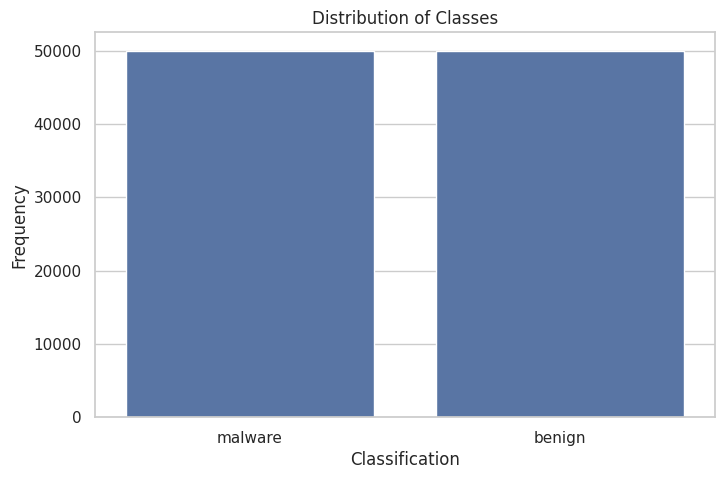

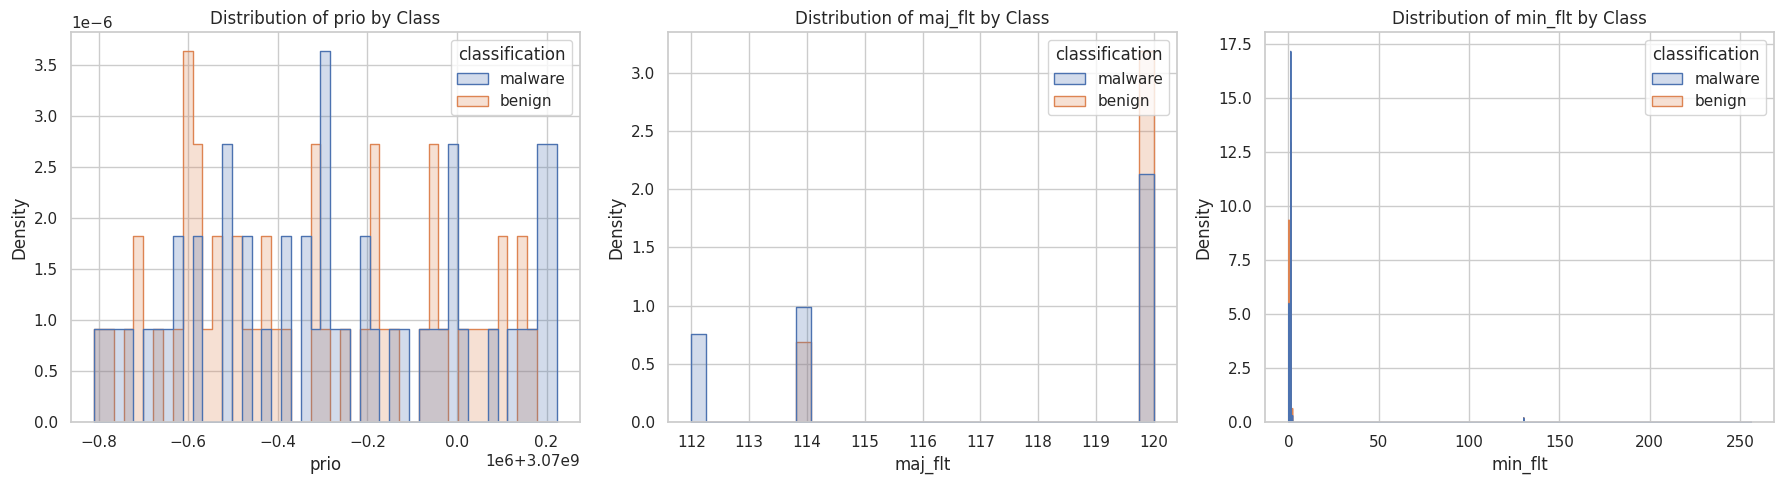

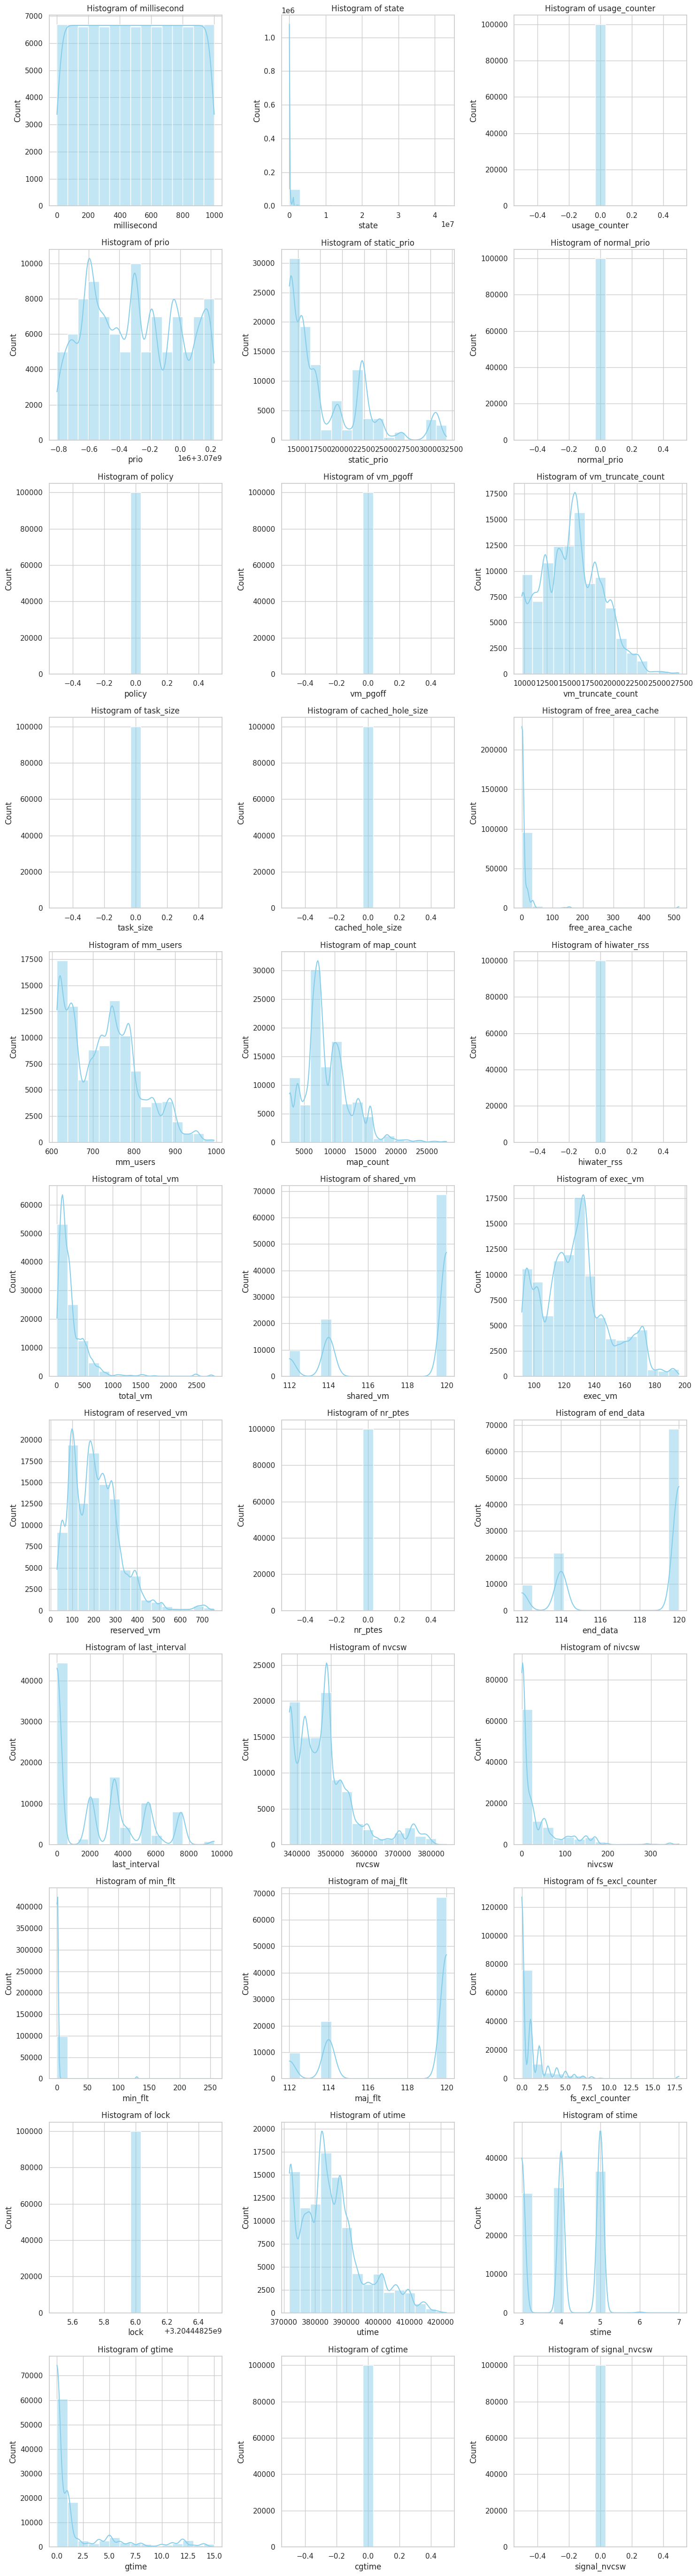

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')

def perform_detailed_eda(dataset_path):
    # Load the dataset
    data = pd.read_csv(dataset_path)

    # Set the aesthetics for the plots
    sns.set(style="whitegrid")

    # Plot for class distribution
    plt.figure(figsize=(8, 5))
    sns.countplot(x='classification', data=data)
    plt.title('Distribution of Classes')
    plt.xlabel('Classification')
    plt.ylabel('Frequency')
    plt.show()

    # Selecting key numerical features for detailed histograms
    features_to_plot = ['prio', 'maj_flt', 'min_flt']

    # Creating histograms for selected features
    fig, axes = plt.subplots(nrows=1, ncols=len(features_to_plot), figsize=(18, 5))
    for i, feature in enumerate(features_to_plot):
        sns.histplot(data=data, x=feature, hue='classification', element='step', stat='density', common_norm=False, ax=axes[i])
        axes[i].set_title(f'Distribution of {feature} by Class')
        axes[i].set_xlabel(f'{feature}')
        axes[i].set_ylabel('Density')
    plt.tight_layout()
    plt.show()

    # Plotting histograms for all numerical columns with considerations for the number of features
    num_cols = data.select_dtypes(include=['number']).columns
    num_rows = (len(num_cols) - 1) // 3 + 1
    plt.figure(figsize=(15, 5 * num_rows))
    for idx, col in enumerate(num_cols):
        plt.subplot(num_rows, 3, idx + 1)
        sns.histplot(data[col], kde=True, bins=15, color='skyblue')
        plt.title(f'Histogram of {col}')
    plt.tight_layout()
    plt.show()

# Example usage:
perform_detailed_eda('/content/drive/MyDrive/Colab Notebooks/dataset.csv')


**2.4 Coorelation Heatmap**

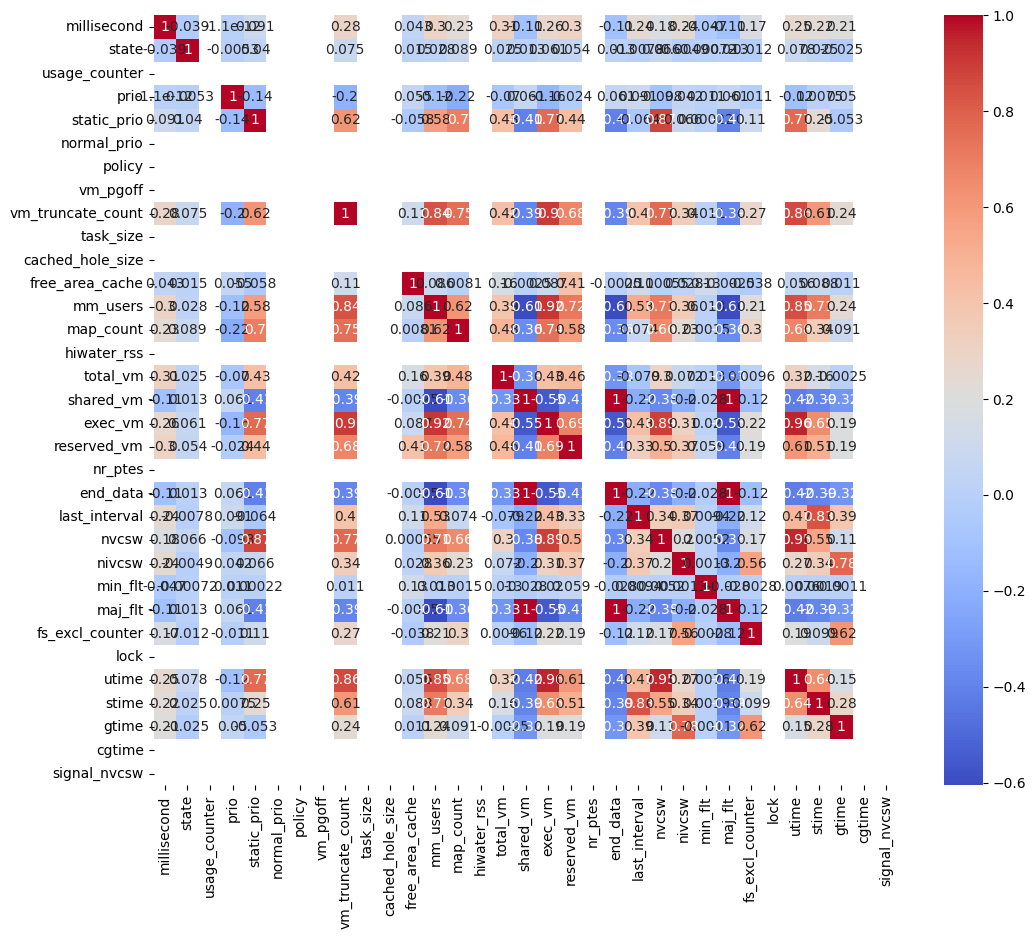

In [14]:
import pandas as pd
import numpy as np  # Add this line to import NumPy
import seaborn as sns
import matplotlib.pyplot as plt

def plot_correlation_heatmap(dataset_path):
    dataset = pd.read_csv(dataset_path)
    # Selecting only numeric columns for correlation analysis
    numeric_dataset = dataset.select_dtypes(include=[np.number])
    plt.figure(figsize=(12, 10))
    sns.heatmap(numeric_dataset.corr(), annot=True, cmap='coolwarm')
    plt.show()

# Example usage:
plot_correlation_heatmap('/content/drive/MyDrive/Colab Notebooks/dataset.csv')

**Load and Split the Dataset**

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
data_path = '/content/drive/MyDrive/Colab Notebooks/dataset.csv'
dataset = pd.read_csv(data_path)

# Split the dataset into features and target variable
X = dataset.drop(columns=['classification'])
y = dataset['classification']

# Convert categorical columns to numerical using one-hot encoding if necessary
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets, ensuring a balanced split with respect to the target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print the confirmation and details of the dataset split
print("Dataset split into training and testing sets successfully.")
print(f"Training data shape: {X_train.shape} (features), {y_train.shape} (target)")
print(f"Testing data shape: {X_test.shape} (features), {y_test.shape} (target)")

Dataset split into training and testing sets successfully.
Training data shape: (80000, 132) (features), (80000,) (target)
Testing data shape: (20000, 132) (features), (20000,) (target)


**Initialisation of Machine Learning Classifiers**



In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Initialize the classifiers
logistic_regression_classifier = LogisticRegression(max_iter=1000, random_state=42)
print("Logistic Regression classifier has been initialized.")

decision_tree_classifier = DecisionTreeClassifier(random_state=42)
print("Decision Tree classifier has been initialized.")

random_forest_classifier = RandomForestClassifier(random_state=42)
print("Random Forest classifier has been initialized.")

Logistic Regression classifier has been initialized.
Decision Tree classifier has been initialized.
Random Forest classifier has been initialized.


**Training the Machine Learning Classifiers**

In [5]:
import time
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Initialize the classifiers
logistic_regression_classifier = LogisticRegression(max_iter=1000, random_state=42)
decision_tree_classifier = DecisionTreeClassifier(random_state=42)
random_forest_classifier = RandomForestClassifier(random_state=42)

# Train Logistic Regression
start_time = time.time()
logistic_regression_classifier.fit(X_train, y_train)
elapsed_time = time.time() - start_time
print(f"Logistic Regression training completed in {elapsed_time:.2f} seconds.")

# Train Decision Tree Classifier
start_time = time.time()
decision_tree_classifier.fit(X_train, y_train)
elapsed_time = time.time() - start_time
print(f"Decision Tree training completed in {elapsed_time:.2f} seconds.")

# Train Random Forest Classifier
start_time = time.time()
random_forest_classifier.fit(X_train, y_train)
elapsed_time = time.time() - start_time
print(f"Random Forest training completed in {elapsed_time:.2f} seconds.")

Logistic Regression training completed in 0.68 seconds.
Decision Tree training completed in 1.57 seconds.
Random Forest training completed in 8.32 seconds.


**Testing the Machine Learning Classifiers**

In [6]:
import time
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Assuming classifiers are already initialized and trained from previous examples

# Test Logistic Regression
start_time = time.time()
y_pred_logistic = logistic_regression_classifier.predict(X_test)
elapsed_time = time.time() - start_time
print(f"Testing with Logistic Regression completed in {elapsed_time:.2f} seconds.")

# Test Decision Tree Classifier
start_time = time.time()
y_pred_decision_tree = decision_tree_classifier.predict(X_test)
elapsed_time = time.time() - start_time
print(f"Testing with Decision Tree completed in {elapsed_time:.2f} seconds.")

# Test Random Forest Classifier
start_time = time.time()
y_pred_random_forest = random_forest_classifier.predict(X_test)
elapsed_time = time.time() - start_time
print(f"Testing with Random Forest completed in {elapsed_time:.2f} seconds.")

Testing with Logistic Regression completed in 0.04 seconds.
Testing with Decision Tree completed in 0.01 seconds.
Testing with Random Forest completed in 0.34 seconds.


**Results of the Machine Learning Classifiers Testing**

In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Adjusting the precision_score call to handle zero division cases
precision_logistic = precision_score(y_test, y_pred_logistic, average='weighted', zero_division=0)
precision_decision_tree = precision_score(y_test, y_pred_decision_tree, average='weighted', zero_division=0)
precision_random_forest = precision_score(y_test, y_pred_random_forest, average='weighted', zero_division=0)

# Calculate metrics for Logistic Regression
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
recall_logistic = recall_score(y_test, y_pred_logistic, average='weighted')
f1_logistic = f1_score(y_test, y_pred_logistic, average='weighted')

# Calculate metrics for Decision Tree
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
recall_decision_tree = recall_score(y_test, y_pred_decision_tree, average='weighted')
f1_decision_tree = f1_score(y_test, y_pred_decision_tree, average='weighted')

# Calculate metrics for Random Forest
accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)
recall_random_forest = recall_score(y_test, y_pred_random_forest, average='weighted')
f1_random_forest = f1_score(y_test, y_pred_random_forest, average='weighted')

# Create a dictionary of metrics for each classifier
data = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Logistic Regression': [
        f"{accuracy_logistic:.2%}",
        f"{precision_logistic:.2%}",
        f"{recall_logistic:.2%}",
        f"{f1_logistic:.2%}"
    ],
    'Decision Tree': [
        f"{accuracy_decision_tree:.2%}",
        f"{precision_decision_tree:.2%}",
        f"{recall_decision_tree:.2%}",
        f"{f1_decision_tree:.2%}"
    ],
    'Random Forest': [
        f"{accuracy_random_forest:.2%}",
        f"{precision_random_forest:.2%}",
        f"{recall_random_forest:.2%}",
        f"{f1_random_forest:.2%}"
    ]
}

# Convert the dictionary to a DataFrame
results_df = pd.DataFrame(data)

# Set 'Metric' as the index for better readability
results_df.set_index('Metric', inplace=True)

# Print the DataFrame
print("Model Performance Metrics:")
print(results_df)

Model Performance Metrics:
          Logistic Regression Decision Tree Random Forest
Metric                                                   
Accuracy               50.00%       100.00%       100.00%
Precision              25.00%       100.00%       100.00%
Recall                 50.00%       100.00%       100.00%
F1-Score               33.33%       100.00%       100.00%


**Generate the Confusion Matrix**

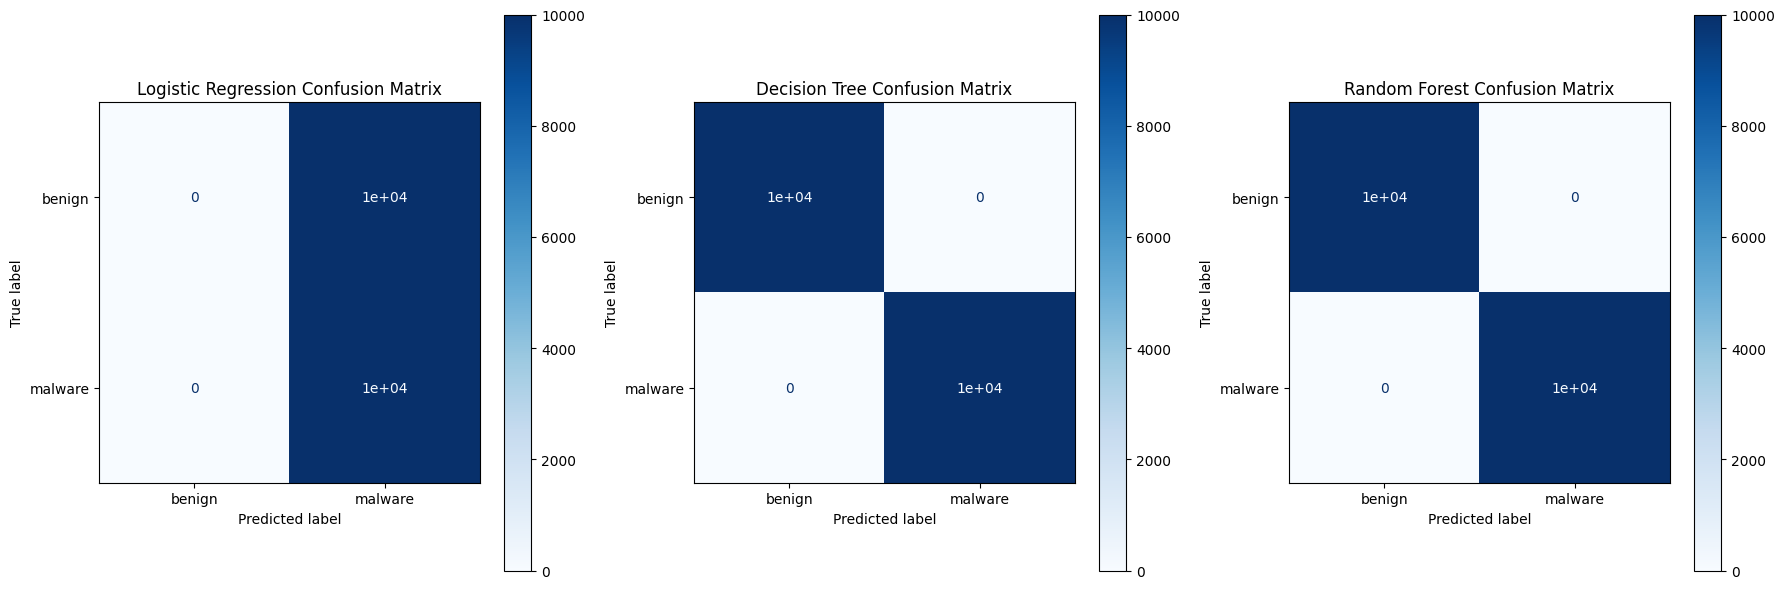

In [9]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate confusion matrix for Logistic Regression
cm_logistic = confusion_matrix(y_test, y_pred_logistic)

# Generate confusion matrix for Decision Tree
cm_decision_tree = confusion_matrix(y_test, y_pred_decision_tree)

# Generate confusion matrix for Random Forest
cm_random_forest = confusion_matrix(y_test, y_pred_random_forest)

# Plotting confusion matrices
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
ConfusionMatrixDisplay(cm_logistic, display_labels=logistic_regression_classifier.classes_).plot(ax=ax[0], cmap='Blues')
ax[0].set_title('Logistic Regression Confusion Matrix')
ConfusionMatrixDisplay(cm_decision_tree, display_labels=decision_tree_classifier.classes_).plot(ax=ax[1], cmap='Blues')
ax[1].set_title('Decision Tree Confusion Matrix')
ConfusionMatrixDisplay(cm_random_forest, display_labels=random_forest_classifier.classes_).plot(ax=ax[2], cmap='Blues')
ax[2].set_title('Random Forest Confusion Matrix')
plt.tight_layout()
plt.show()